In [8]:
import deblend
import om10
import desc.slrealizer
import warnings
warnings.filterwarnings("ignore")

In [9]:
db = om10.DB()
db.select_random(maglim=23.3,area=18000.0,IQ=0.75)
db.paint(synthetic=True)
realizer = desc.slrealizer.SLRealizer(catalog=db, observation="../../../data/twinkles_observation_history.csv")

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: selection yields 2813 lenses


In [10]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


In [11]:
# Choose a good lens system, with large imsep and 4 images:
                      
wide = db.sample[np.where(db.sample['IMSEP'] > 1.0)]
print "Number of lenses with image separation > 1.0 arcsec = ",len(wide)

wide_quads = wide[np.where(wide['NIMG'] == 4)]
print "Number of these with 4 images = ",len(wide_quads)

bright_wide_quads = wide[np.where(wide_quads['MAGI'] < 22)]
print "Number of these with i3 < 22 = ",len(bright_wide_quads)

db.sample = bright_wide_quads    
                      
k = db.sample[0]['LENSID']

Number of lenses with image separation > 1.0 arcsec =  1936
Number of these with 4 images =  297
Number of these with i3 < 22 =  134


# Three different ways of implementation

All the versions --- 1, 2, and 3 --- agreed on the zeroth and the first moment.

For version 1(code that I wrote + stackExchange), it just implements the algorithm using the definition of the zeroth, first, and the second moment. It does give reasonable values, but it only divides the value of calculated 2nd moments($I_{xx}$, $I_{yy}$, $I_{xy}$) with the zeroth moment once. 

For version 2($skimage.measure.moments$), it gives out ($I_{xx}$, $I_{yy}$, $I_{xy}$). I divided by zeroth moment sqaure. The shape and intensity values are a little odd. 

For version 3(code that I wrote + $scipy.stats.moment$), $scipy.stats.moment$ does array.ravel() (squeeze 2d array into 1d) and calculate the standard deviation for the whole array. This is not what we want.

OM10: Extracted OM10 lens number 24704303:
 LENSID  FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
-------- -------- ---- ----- ... ------------- ------------- -------------
24704303        0    2 0.918 ...         21.43 21.1995552076 22.3712675158
galaxy_x, galaxy_y, PSF_HWHM:
multiplication factor :  5.45212529762e-09
1.86039153981
0.146124797323
#####################BEFORE DEBLEND PLOT LENSES##################################


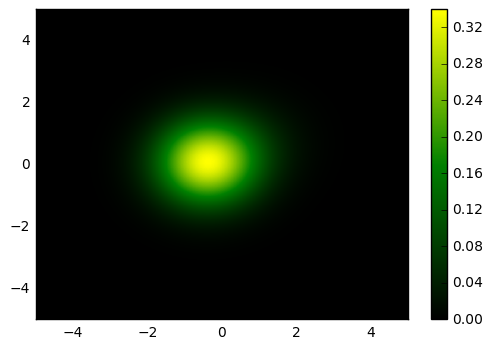

This is the covariance I calculated:  [[ 10132.43705234    657.06778006]
 [   657.06778006   9267.46683596]]
This is the eigenvalue I have (array([  8913.32532599,  10486.57856231]), array([[ 0.47444852, -0.88028325],
       [-0.88028325, -0.47444852]]))
standard deviation is:  94.4104089917
standard deviation is:  102.403996808


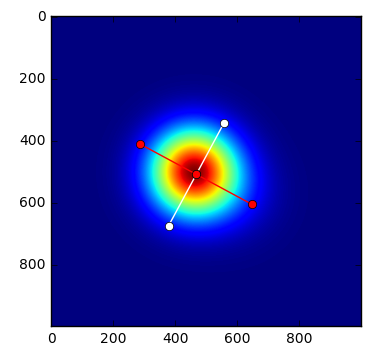

**************zeroth moment:  20065.1328246
**************first moment:  -0.32013855452 0.0891381035164
**************second moment:  [[ 10132.43705234    657.06778006]
 [   657.06778006   9267.46683596]]
#####################PRINTING NULL DEBLENDER'S PLOT###############################


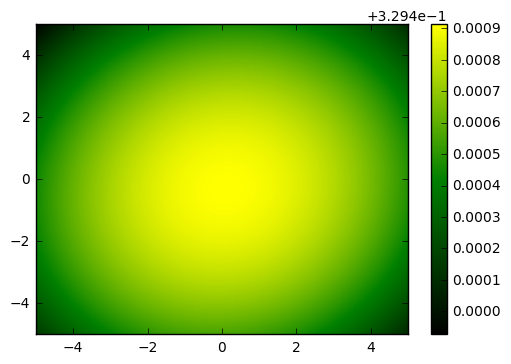

###############################################################################
('chi squared: ', 0.0011317663997343443, 'p: ', 1.0)
('Chi squared distance is : ', (0.0011317663997343443, 1.0))
('KL distance is : ', 5.7443791341489518)


In [12]:
realizer.deblend(lensID=k, version=1, null_deblend=True, debug=True, show_plot=True)

OM10: Extracted OM10 lens number 24704303:
 LENSID  FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
-------- -------- ---- ----- ... ------------- ------------- -------------
24704303        0    2 0.918 ...         21.43 21.1995552076 22.3712675158
galaxy_x, galaxy_y, PSF_HWHM:
multiplication factor :  1.68645957288e-08
1.86039153981
0.146124797323
#####################BEFORE DEBLEND PLOT LENSES##################################


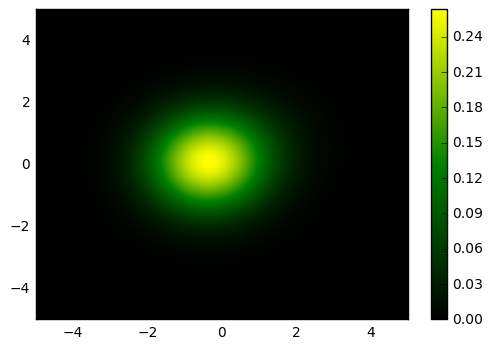

#####################PRINTING NULL DEBLENDER'S PLOT###############################


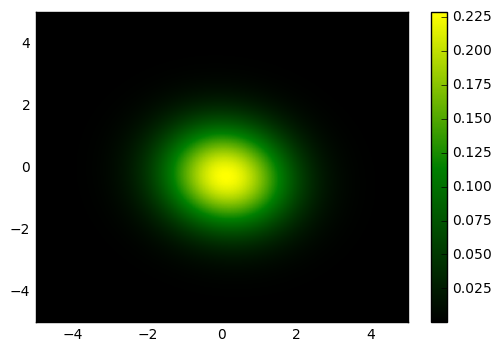

In [13]:
realizer.deblend(lensID=k, version=2, null_deblend=True, debug=True, show_plot=True, report_distance=False)

OM10: Extracted OM10 lens number 24704303:
 LENSID  FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
-------- -------- ---- ----- ... ------------- ------------- -------------
24704303        0    2 0.918 ...         21.43 21.1995552076 22.3712675158
galaxy_x, galaxy_y, PSF_HWHM:
multiplication factor :  5.45212529762e-09
1.86039153981
0.146124797323
#####################BEFORE DEBLEND PLOT LENSES##################################


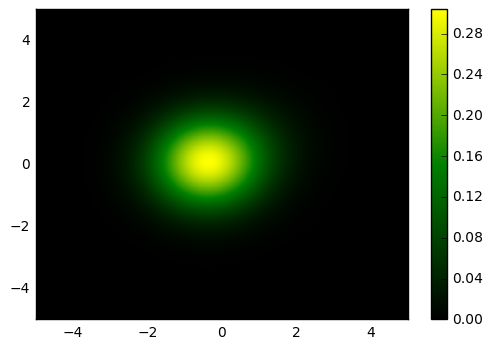

**************zeroth moment:  20065.0592443
**************first moment:  0.0891341119494 -0.320138076742
**************second moment:  0.00261113433123
#####################PRINTING NULL DEBLENDER'S PLOT###############################


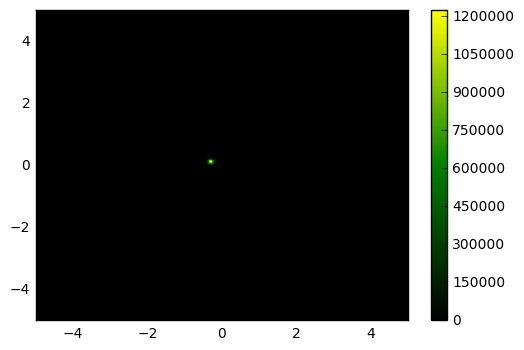

In [14]:
realizer.deblend(lensID=k, version=3, null_deblend=True, debug=True, show_plot=True, report_distance=False)